In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
# Cell 1: Set Python path to the root directory
import sys
import os

# Get the path to the root directory
root_dir = os.path.abspath("..")

# Add the root directory to the Python path
if root_dir not in sys.path:
    sys.path.append(root_dir)


In [53]:
# Cell 2: Import necessary modules and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import src.data.make_dataset as make_ds
# import NBA_AMLAA_Assignment1.src.data.make_dataset as make_ds
# from src.data.make_dataset import clean_data , report_missing_values
# from src.features.build_features import pre_processing, apply_pca, important_features
# from src.models.train_model import train_model
# from src.models.predict_model import predict_test_data, preprocess_test_data
import src.visualization.visualize as viz
from nba_drafted.make_dataset import clean_data , report_missing_values
from nba_drafted.build_features import pre_processing, apply_pca, important_features
from nba_drafted.train_model import train_model
from nba_drafted.predict_model import predict_test_data, preprocess_test_data
import plotly.express as px

In [54]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust the width to show all content
pd.set_option('display.max_colwidth', None)

In [55]:
train_filepath = '../data/raw/train.csv'

train_df = pd.read_csv(train_filepath, low_memory=False)
train_df.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,b2716b2d-3422-4959-9fe7-fe496414a4e8,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,bb387960-e3a0-4ffd-96ae-184bad07cb8a,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,89bbdf11-eadd-4de4-95e5-03f7e2874aa1,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0c87ada8-8446-4ea2-a05b-bd07aed5f37a,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,84661e00-ad20-4308-817e-efa8da52a86c,0.0


In [56]:
def eda(df):
  df.columns = [train_col.lower() for train_col in df.columns]
  #  Top 10 Teams
  top_10 = df['team'].value_counts().nlargest(10).index
  top_10 = df[df['team'].isin(top_10)]
  no_drafted = top_10[top_10['drafted'] == 0]

  fig = px.bar(no_drafted, x='team', title='Top Team with Undrafted Players Analysis',
              labels={'team': 'Top most Teams'}, color_discrete_sequence=['burlywood'])
  fig.update_layout(
      width=800,
      height=500,
      xaxis_title='team',
      yaxis_title='Counts of Undrafted Players',
      xaxis=dict(tickmode='linear'),
      template='plotly_white'
  )

  # Show the plot
  fig.show()

  yearly_ftp = df.groupby('year')['ft_per'].sum().reset_index()
  yearly_ftp['year'] = pd.to_datetime(yearly_ftp['year'], format='%Y').dt.year
  fig = px.line(yearly_ftp,
                x='year',
                y='ft_per',
                title='Free Throws Attempts Yearly Analysis',
                labels={'ft_per': 'Free Throws Percentage', 'year': 'Year'},
                template='plotly_white')

  fig.add_scatter(x=yearly_ftp['year'],
                  y=yearly_ftp['ft_per'].rolling(window=2).mean(),
                  mode='lines',
                  line=dict(color='red', dash='dash'),
                  name='Trendline')

  # Customize the layout
  fig.update_layout(
      width=800,
      height=500,
      xaxis_title='Year',
      yaxis_title='Free Throws Percentage',
      xaxis=dict(tickmode='linear'),
      template='plotly_white'
  )

  # Show the plot
  fig.show()


  top_5 = df['team'].value_counts().nlargest(5).index
  top_5 = df[df['team'].isin(top_5)]
  yearly_team = top_5.groupby(['year','team'])['gp'].sum().reset_index()
  yearly_team['year'] = pd.to_datetime(yearly_team['year'], format='%Y').dt.year
  yearly_team=yearly_team[yearly_team['year'] >=2016]
  fig = px.bar(yearly_team, x='team', y='gp', facet_col='year', barmode='group', title='Top 5 teams with number of games played across seasons 2016-18',
              labels={'gp': 'Number of Games Played', 'team': 'Top 5 Teams',}, color_discrete_sequence=['lightcoral'])

  fig.update_layout(
      width=1100,
      height=500,
      xaxis_title='Top 5 Teams',
      yaxis_title='Number of Games Played',
      xaxis=dict(tickmode='linear'),
      template='plotly_white'
  )

  # Show the plot
  fig.show()

  top_10 = df['team'].value_counts().nlargest(10).index
  top_10_df = df[df['team'].isin(top_10)]

  perf_team = top_10_df.groupby('team')[['twop_per', 'tp_per']].sum().reset_index()
  perf_team = perf_team.melt(id_vars='team',
                                    value_vars=['twop_per', 'tp_per'],
                                    var_name='Pointer Type',
                                    value_name='Total')
  fig = px.bar(perf_team, x='team', y='Total', color='Pointer Type',barmode='group',
              title='Top 10 Teams Performance Metrics: Two and Three Pointers',labels={'team': 'Team', 'Total': 'Total Points'},color_discrete_sequence=['lightcoral', 'deeppink'])

  # Update layout
  fig.update_layout(
      width=1100,
      height=500,
      xaxis_title='Top 10 Teams',
      yaxis_title='Total Points',
      xaxis=dict(tickmode='linear'),
      template='plotly_white'
  )

  # Show the plot
  fig.show()

  top_10_a = df['team'].value_counts().nlargest(10).index
  top_10_df1 = df[df['team'].isin(top_10_a)]

  perf_team1 = top_10_df1.groupby('team')[['stl_per', 'blk_per']].sum().reset_index()
  perf_team1 = perf_team1.melt(id_vars='team',
                                    value_vars=['stl_per', 'blk_per'],
                                    var_name='Pointer Type',
                                    value_name='Total')
  fig = px.bar(perf_team1, x='team', y='Total', color='Pointer Type',barmode='group',
              title='Top 10 Teams Performance Metrics: Steals and Blocks Percentages',labels={'team': 'Team', 'Total': 'Total steal and block points'},color_discrete_sequence=['lightgreen', 'olive'])

  # Update layout
  fig.update_layout(
      width=1100,
      height=500,
      xaxis_title='Top 10 Teams',
      yaxis_title='Total Points',
      xaxis=dict(tickmode='linear'),
      template='plotly_white'
  )

  # Show the plot
  fig.show()


  top_101 = df['team'].value_counts().nlargest(10).index
  top_10 = df[df['team'].isin(top_101)]
  drafted = top_10[top_10['drafted'] ==1]
  counts = drafted['team'].value_counts().reset_index()
  counts.columns = ['team', 'count']

  fig = px.pie(counts, names='team', values='count', color='team',color_discrete_sequence=["blue","red"],
                title='Top Teams with Drafted Players')
  fig.update_layout(
        width=800,
        height=500,
          xaxis_title='Team',
          yaxis_title='Counts'
      )
  fig.show()

In [57]:
eda(train_df)

In [58]:
make_ds.report_missing_values(train_df)

,missing_values,percentage_missing
team,0,0.000000
conf,0,0.000000
gp,0,0.000000
min_per,0,0.000000
ortg,0,0.000000
usg,0,0.000000
efg,0,0.000000
ts_per,0,0.000000
orb_per,0,0.000000
drb_per,0,0.000000


In [59]:
train_df_clean = make_ds.clean_data(train_df)

Initial DataFrame shape: (46618, 64)
Imputing missing values...
Shape after imputing missing values: (46618, 64)
Dropping unnecessary columns...
Shape after dropping unnecessary columns: (46618, 60)
Dropping columns with high percentage of missing values...
Shape after dropping high missing columns: (46618, 57)
Handling duplicates...
Shape after handling duplicates: (46617, 57)
Filtering 'yr' values: ['Jr', 'Fr', 'So', 'Sr']
Shape after filtering 'yr' values: (46610, 57)
Encoded 'yr' as categorical codes.
Encoding categorical columns...
Shape after encoding categorical columns: (46610, 57)
Final DataFrame shape: (46610, 57)


In [60]:
train_df.columns

Index(['team', 'conf', 'gp', 'min_per', 'ortg', 'usg', 'efg', 'ts_per',
       'orb_per', 'drb_per', 'ast_per', 'to_per', 'ftm', 'fta', 'ft_per',
       'twopm', 'twopa', 'twop_per', 'tpm', 'tpa', 'tp_per', 'blk_per',
       'stl_per', 'ftr', 'yr', 'porpag', 'adjoe', 'pfr', 'year', 'ast_tov',
       'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio',
       'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'drtg', 'adrtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm',
       'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'drafted'],
      dtype='object')

In [61]:
make_ds.report_missing_values(train_df_clean)

,missing_values,percentage_missing
team,0,0.000000
conf,0,0.000000
gp,0,0.000000
min_per,0,0.000000
ortg,0,0.000000
usg,0,0.000000
efg,0,0.000000
ts_per,0,0.000000
orb_per,0,0.000000
drb_per,0,0.000000


In [62]:
train_df_clean.dropna(inplace= True)

In [63]:
train_df_clean.head()

,team,conf,gp,min_per,ortg,usg,efg,ts_per,orb_per,drb_per,ast_per,to_per,ftm,fta,ft_per,twopm,twopa,twop_per,tpm,tpa,tp_per,blk_per,stl_per,ftr,yr,porpag,adjoe,pfr,year,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
0,1.590953e-07,0.002596,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,2,0.258086,89.3938,2.5,2009,1.823646,18.0,32.0,8.0,26.0,0.562907,0.322901,0.0,0.0,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0.0
1,2.373403e-07,0.004472,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,2,1.334920,100.0660,3.4,2009,1.631621,18.0,32.0,8.0,26.0,0.562907,0.322901,0.0,0.0,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0.0
2,8.064561e-03,0.027501,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,3,2.274070,104.1070,1.7,2009,1.081662,18.0,32.0,8.0,26.0,0.562907,0.322901,0.0,0.0,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0.0
3,4.335905e-08,0.005738,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,3,0.552857,93.2086,2.0,2009,0.942830,18.0,32.0,8.0,26.0,0.562907,0.322901,0.0,0.0,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0.0
4,9.649680e-08,0.000831,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,3,1.060130,97.8554,3.8,2009,0.491229,18.0,32.0,8.0,26.0,0.562907,0.322901,0.0,0.0,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0.0


In [64]:
metadata_df = pd.read_csv('../data/raw/metadata.csv')
metadata_df

,feature,name,description
0,1,team,Name of team
1,2,conf,Name of conference
2,3,GP,Games played
3,4,Min_per,Player's percentage of available team minutes played
4,5,ORtg,"ORtg - Offensive Rating (available since the 1977-78 season in the NBA); for players it is points produced per 100 posessions, while for teams it is points scored per 100 possessions. This rating was developed by Dean Oliver, author of Basketball on Paper. Please see the article Calculating Individual Offensive and Defensive Ratings for more information."
5,6,usg,Usg% - Usage Percentage (available since the 1977-78 season in the NBA); the formula is 100 * ((FGA + 0.44 * FTA + TOV) * (Tm MP / 5)) / (MP * (Tm FGA + 0.44 * Tm FTA + Tm TOV)). Usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor.
6,7,eFG,"eFG% - Effective Field Goal Percentage; the formula is (FG + 0.5 * 3P) / FGA. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal. For example, suppose Player A goes 4 for 10 with 2 threes, while Player B goes 5 for 10 with 0 threes. Each player would have 10 points from field goals, and thus would have the same effective field goal percentage (50%)."
7,8,TS_per,"TS% - True Shooting Percentage; the formula is PTS / (2 * TSA). True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws."
8,9,ORB_per,ORB% - Offensive Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (ORB * (Tm MP / 5)) / (MP * (Tm ORB + Opp DRB)). Offensive rebound percentage is an estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor.
9,10,DRB_per,DRB% - Defensive Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (DRB * (Tm MP / 5)) / (MP * (Tm DRB + Opp ORB)). Defensive rebound percentage is an estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor.


In [65]:
# Cell 4: Feature engineering and preprocessing

# Check the content before passing to the function
print("Initial training data snapshot:\n", train_df_clean.head())

# Process the training data using the revised pre_processing function
train_df_processed = pre_processing(train_df_clean)

# Display the first few rows of the processed data
print("Processed data snapshot:")
print(train_df_processed.head())


Initial training data snapshot:
            team      conf  gp  min_per   ortg   usg   efg  ts_per  orb_per  \
0  1.590953e-07  0.002596  26     29.5   97.3  16.6  42.5   44.43      1.6   
1  2.373403e-07  0.004472  34     60.9  108.3  14.9  52.4   54.48      3.8   
2  8.064561e-03  0.027501  27     72.0   96.2  21.8  45.7   47.98      2.1   
3  4.335905e-08  0.005738  30     44.5   97.7  16.0  53.6   53.69      4.1   
4  9.649680e-08  0.000831  33     56.2   96.5  22.0  52.8   54.31      8.3   

   drb_per  ast_per  to_per  ftm  fta  ft_per  twopm  twopa  twop_per  tpm  \
0      4.6     15.8    16.3   10   14   0.714     26     68     0.382   13   
1      6.3     13.6    19.8   30   45   0.667     56    113     0.496   20   
2      8.0     14.7    15.9   45   67   0.672     67    157     0.427   50   
3      9.4     13.7    23.8   14   27   0.519     25     63     0.397   28   
4     18.6      8.2    22.7   64  114   0.561     93    176     0.528    0   

   tpa  tp_per  blk_per  stl_

In [66]:
top_features = important_features(train_df_processed,target_col='drafted',n_top=20)
top_features

Top Features:
 Index(['team', 'dporpag', 'porpag', 'stops', 'gbpm', 'bpm', 'ogbpm', 'adjoe',
       'twopa', 'twopm', 'obpm', 'fta', 'adrtg', 'conf', 'pts', 'dunksmade',
       'dunksmiss_dunksmade', 'dreb', 'dgbpm', 'mp'],
      dtype='object')


Index(['team', 'dporpag', 'porpag', 'stops', 'gbpm', 'bpm', 'ogbpm', 'adjoe',
       'twopa', 'twopm', 'obpm', 'fta', 'adrtg', 'conf', 'pts', 'dunksmade',
       'dunksmiss_dunksmade', 'dreb', 'dgbpm', 'mp'],
      dtype='object')

<!-- Use these top features as well but train a different model -->

In [67]:
from sklearn.linear_model import LogisticRegression

Number of PCA components used: 35
Training logistic_regression...


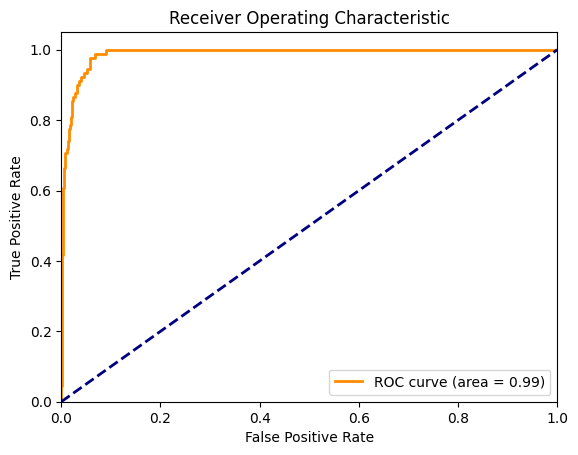

Tuning hyperparameters for logistic_regression using GridSearchCV...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameters found: {'C': 1.0, 'penalty': 'l2'}


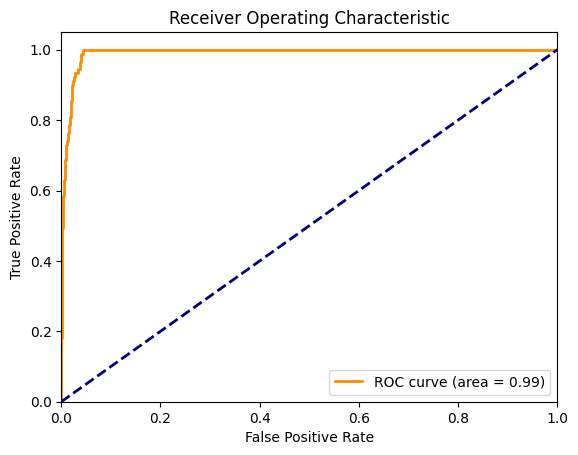

Tuning hyperparameters for logistic_regression using GridSearchCV...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameters found: {'C': 10, 'penalty': 'l2'}


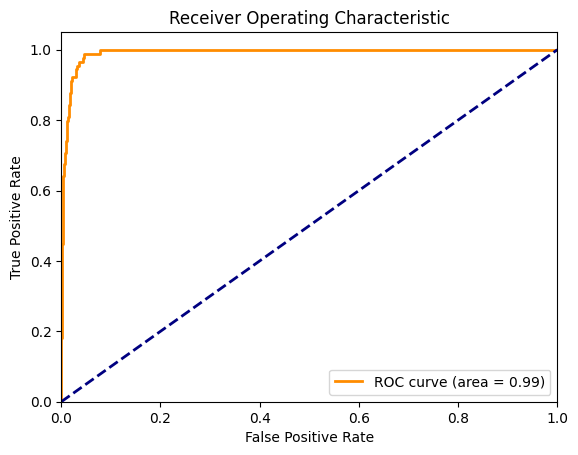

Tuning hyperparameters for logistic_regression using GridSearchCV...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameters found: {'C': 1.0, 'penalty': 'l2'}


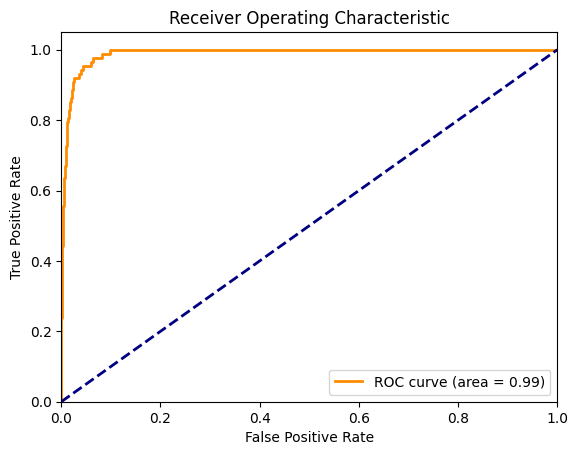

Tuning hyperparameters for logistic_regression using GridSearchCV...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameters found: {'C': 10, 'penalty': 'l2'}


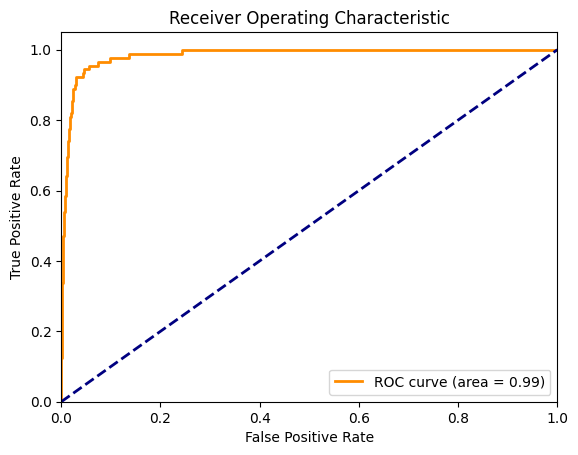

Mean AUC across all folds for logistic_regression: 0.9895312626701619
Model saved as 'logistic_regression_model.pkl'
PCA model saved as 'logistic_regression_pca.pkl'


In [68]:
logistic_model = LogisticRegression(penalty='l2', C=1.0)
param_grid = {
    'C': [0.1, 1.0, 10],
    'penalty': ['l1', 'l2']
}

# Call the train_model function
model_logistic, pca_model_logistic, X_validation, y_val = train_model(
    train_df_processed,           # Processed training data
    logistic_model,               # Logistic Regression model
    'logistic_regression',        # Model name (used for saving)
    'drafted',
    param_grid=param_grid                    # Target column name (you can change this if your target column is different)
)

In [69]:
from src.models.predict_model import load_models, predict_test_data

In [70]:
# Cell 1: Import necessary modules and functions
import pandas as pd
from src.models.predict_model import predict_test_data
from sklearn.metrics import roc_auc_score, classification_report

# Assuming you have a test CSV file ready
test_filepath = '../data/raw/test.csv'  # Update with the actual path to your test dataset

In [71]:
test_df = pd.read_csv(test_filepath, low_memory= False)

In [72]:
# processed_test_df = preprocess_test_data(test_df=test_df)

In [73]:
# File paths for the saved model and PCA (assuming 'logistic_regression' was used in training)
model_filepath = 'logistic_regression_model.pkl'
pca_filepath = 'logistic_regression_pca.pkl'


# Make predictions on the test data
y_test_pred = predict_test_data(test_filepath, model_filepath=model_filepath, pca_filepath=pca_filepath)

# Display the first few predicted probabilities
print("Predicted probabilities (first 10):", y_test_pred[:10])



Initial Test DataFrame shape: (4970, 63)
Imputing missing values...
Shape after imputing missing values: (4970, 63)
Dropping unnecessary columns...
Shape after dropping unnecessary columns: (4970, 59)
Dropping columns with high percentage of missing values...
Shape after dropping high missing columns: (4970, 56)
Encoded 'yr' as categorical codes.
Encoding categorical columns with loaded TargetEncoder...
Shape after encoding categorical columns: (4970, 56)
team                   0
conf                   0
GP                     0
Min_per                0
Ortg                   0
usg                    0
eFG                    0
TS_per                 0
ORB_per                0
DRB_per                0
AST_per                0
TO_per                 0
FTM                    0
FTA                    0
FT_per                 0
twoPM                  0
twoPA                  0
twoP_per               0
TPM                    0
TPA                    0
TP_per                 0
blk_per        

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AST_per
- DRB_per
- FTA
- FTM
- FT_per
- ...
Feature names seen at fit time, yet now missing:
- ast_per
- drb_per
- efg
- ft_per
- fta
- ...


In [ ]:
y_test_pred

array([1.45902395e-131, 9.30265706e-108, 1.11616906e-107, ...,
       3.53094381e-114, 1.05833175e-111, 2.69139470e-127])

In [ ]:
sample_submission = pd.read_csv('../data/raw/test.csv')
sample_submission.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,0.0,0.0,0,0,0.000,0,0,0.000,1,3,0.333,0.0,0.0,0.0,Sr,4-Jun,25.0,0.261536,91.8097,3.5,2021,all,NaN,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,106.4190,110.8410,0.655018,3.04099,-6.329190,-2.48656,-3.842620,-4.743390,10.0000,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,23549e01-c1b3-4ca0-a0fd-de9b5d76276b
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,8.1,30.4,1,2,0.500,2,8,0.250,7,28,0.250,0.0,0.9,5.6,Sr,Jun-00,0.0,-1.110000,57.5491,2.8,2021,all,NaN,0.384583,2.0,4.0,0.0,4.0,0.5000,0.0000,0.0,0.0,NaN,NaN,110.1920,116.0180,0.450228,21.52420,-11.237600,-7.65745,-3.580200,-11.907200,11.5455,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,52a518bb-b34a-4b43-adee-5e996cb853fa
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,10.0,21.9,14,32,0.438,33,59,0.559,0,2,0.000,9.0,1.7,52.5,Sr,9-Jun,32.0,0.662985,93.6716,5.5,2021,all,NaN,0.500000,26.0,37.0,7.0,22.0,0.7027,0.3182,9.0,10.0,0.9,NaN,99.2886,105.5980,1.706130,48.26240,-0.796603,-3.88882,3.092220,-1.207060,23.3333,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,ad3d9117-b6bf-4675-ab97-3497acf3e555
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,0.0,33.6,0,0,0.000,1,2,0.500,1,1,1.000,0.0,0.0,0.0,Sr,2-Jun,32.0,0.135373,102.3240,5.0,2021,all,NaN,0.000000,0.0,0.0,1.0,2.0,NaN,0.5000,0.0,0.0,NaN,NaN,100.4870,95.3504,0.253055,2.53301,-1.802590,-1.15052,-0.652075,0.194558,2.2857,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,eaf66a5c-6f4c-4070-bc70-a99d731b3740
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,7.8,16.1,31,36,0.861,62,129,0.481,58,147,0.395,0.3,1.4,13.0,Sr,4-Jun,5.0,2.977030,111.4260,3.5,2021,all,92.8,0.586950,14.0,26.0,48.0,103.0,0.5385,0.4660,0.0,0.0,NaN,NaN,111.7920,104.3060,2.610670,114.53100,1.064440,2.41992,-1.355480,1.874610,32.7826,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,55d07491-5bd1-447f-844e-9cb36eaa442e


In [ ]:
submission_df = pd.DataFrame({
    'player_id': sample_submission['player_id'],  # Replace 'id_column' with the actual column name
    'drafted': y_test_pred  # Replace 'drafted' with the target column name as in sample_submission
})

# Save the submission file
submission_df.to_csv('test_submission.csv', index=False)